<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EIP4/blob/master/Session3/Assignment3/EIP4_A3_Praveen_Raghuvanshi_Detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


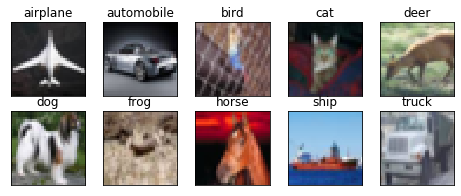

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 14s 37ms/step - loss: 1.8623 - acc: 0.2874 - val_loss: 1.4246 - val_acc: 0.4756
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3487 - acc: 0.5113 - val_loss: 1.1822 - val_acc: 0.5839
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1400 - acc: 0.5971 - val_loss: 0.9960 - val_acc: 0.6470
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 1.0078 - acc: 0.6462 - val_loss: 0.9142 - val_acc: 0.6855
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9198 - acc: 0.6788 - val_loss: 0.8616 - val_acc: 0.7024
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8451 - acc: 0.7078 - val_loss: 0.8153 - val_acc: 0.7179
Epoch 7/50
390/390 [==============================] - 7s 18ms/step - loss: 0.7897 - acc: 0.7274 - val_loss: 0.7159 - val_acc: 0.7541
Epoch 8/50
390/390 [==============================] - 7s 17m

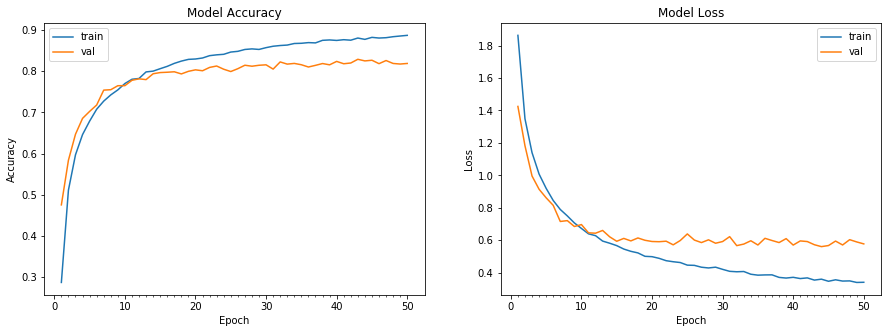

Accuracy on test data is: 81.88


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Solution

### Problem definiton 
- Beat the val accuracy of 81.88
- Parameters limit: 1,00,000
- No of Epochs: 50
- No Dense layer

### Result
- Val Acc : 82.44%

In [49]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Remove D1(393,728) and D2(131,328)
# Remove Dropout from last layer 
# Reduce dropout (0.25 --> 0.1)
# Increase Batch size (128 --> 256)
# Reduce Batch size (128 --> 64)
# Reduce Batch size (128 --> 64 --> 32)
# Removed Last Dense layer --> Added GAP

model = Sequential()

model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # O/P Size: 32x32x48 , RF:3X3
model.add(BatchNormalization()) 
model.add(Activation('relu')) 

model.add(SeparableConv2D(48, 3, 3)) # O/P Size: 32x32x48 , RF:5X5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # O/P Size: 16x16x48 , RF:6X6
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, 3, 3, border_mode='same')) # O/P Size: 16x16x96 , RF:10X10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(96, 3, 3)) # O/P Size: 16x16x96 , RF:14X14
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # O/P Size: 8x8x96 , RF:16X16
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, 3, 3, border_mode='same')) # O/P Size: 8x8x192 , RF:24X24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(192, 3, 3)) # O/P Size: 8x8x192 , RF:32X32+
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # O/P Size: 4x4x192 , RF:36X36
model.add(Dropout(0.1))

model.add(SeparableConv2D(num_classes, 4, border_mode='same')) # O/P Size: 4x4x10 , RF:52x52

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/di

In [50]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_181 (Separa (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_167 (Bat (None, 32, 32, 48)        192       
_________________________________________________________________
activation_172 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_182 (Separa (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_168 (Bat (None, 30, 30, 48)        192       
_________________________________________________________________
activation_173 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 15, 15, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=1562, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
1562/1562 [==============================] - 53s 34ms/step - loss: 1.2843 - acc: 0.5367 - val_loss: 1.0842 - val_acc: 0.6185
Epoch 2/50
1562/1562 [==============================] - 48s 31ms/step - loss: 0.9188 - acc: 0.6764 - val_loss: 0.9258 - val_acc: 0.6803
Epoch 3/50
1562/1562 [==============================] - 49s 31ms/step - loss: 0.7881 - acc: 0.7249 - val_loss: 0.7868 - val_acc: 0.7305
Epoch 4/50
1562/1562 [==============================] - 48s 31ms/step - loss: 0.7133 - acc: 0.7516 - val_loss: 0.7924 - val_acc: 0.7330
Epoch 5/50
1562/1562 [==============================] - 48s 31ms/step - loss: 0.6624 - acc: 0.7684 - val_loss: 0.7295 - val_acc: 0.7463
Epoch 6/50
1562/1562 [==============================] - 48s 31ms/step - loss: 0.6140 - acc: 0.7858 - val_loss: 0.7141 - val_acc: 0.7584
Epoch 7/50
1562/1562 [==============================] - 48s 31ms/step - loss: 0.5857 - acc: 0.7949 - val_loss: 0.7703 - val_acc: 0.7485
Epoch 8/50
1562/1562 [==========================

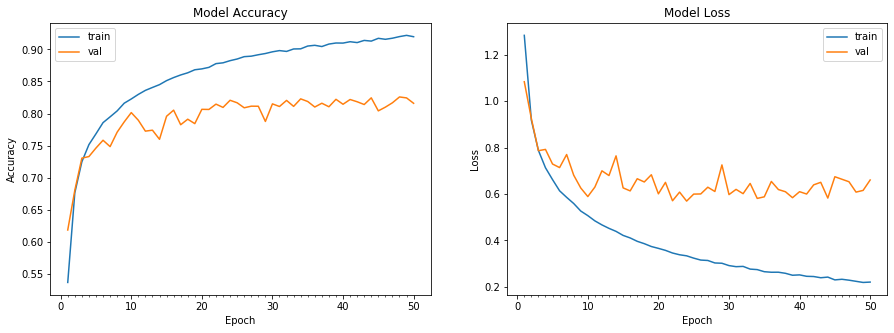

Accuracy on test data is: 81.60


In [51]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 32),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration : First
- Replace Conv2D --> SeparableConv2D

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to t

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 14s 35ms/step - loss: 2.3031 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
390/390 [==============================] - 13s 33ms/step - loss: 2.3028 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
390/390 [==============================] - 13s 33ms/step - loss: 2.3028 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
390/390 [==============================] - 13s 33ms/step - loss: 2.3027 - acc: 0.1007 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
390/390 [==============================] - 13s 33ms/step - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
390/390 [==============================] - 13s 33ms/step - loss: 2.3027 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
390/390 [==============================] - 13s 33ms/step - loss: 2.3027 - acc: 0.1005 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/50
390/390 [==============================] - 13s 33ms

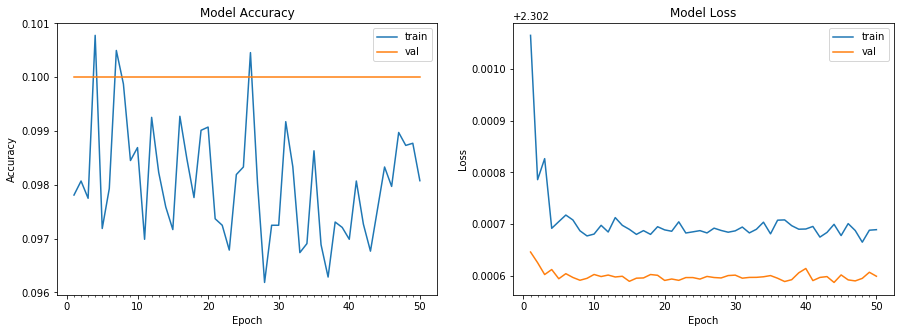

Accuracy on test data is: 10.00


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration : Second
- Batch normalization (SepConv -> BN -> ReLU -> SepConv -> BN -> ReLU -> MP)

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3))`


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 18s 45ms/step - loss: 1.8764 - acc: 0.3292 - val_loss: 1.6525 - val_acc: 0.4213
Epoch 2/50
390/390 [==============================] - 15s 40ms/step - loss: 1.4180 - acc: 0.4829 - val_loss: 1.3146 - val_acc: 0.5343
Epoch 3/50
390/390 [==============================] - 15s 39ms/step - loss: 1.2355 - acc: 0.5545 - val_loss: 1.0561 - val_acc: 0.6145
Epoch 4/50
390/390 [==============================] - 15s 40ms/step - loss: 1.1099 - acc: 0.6057 - val_loss: 1.1465 - val_acc: 0.6002
Epoch 5/50
390/390 [==============================] - 15s 40ms/step - loss: 1.0132 - acc: 0.6424 - val_loss: 0.9489 - val_acc: 0.6677
Epoch 6/50
390/390 [==============================] - 15s 40ms/step - loss: 0.9474 - acc: 0.6677 - val_loss: 1.0144 - val_acc: 0.6534
Epoch 7/50
390/390 [==============================] - 15s 39ms/step - loss: 0.8897 - acc: 0.6898 - val_loss: 0.7969 - val_acc: 0.7188
Epoch 8/50
390/390 [==============================] - 15s 40ms

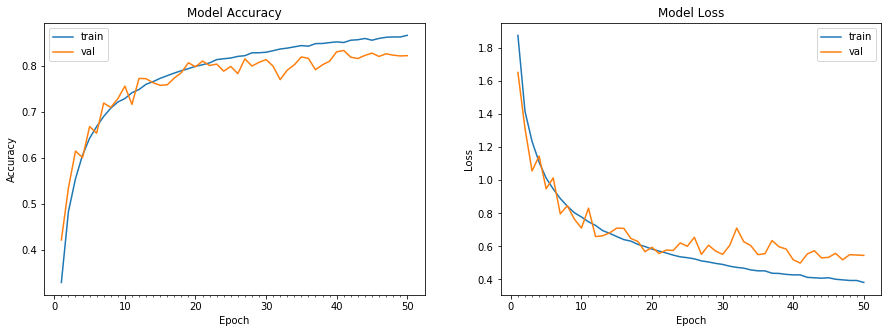

Accuracy on test data is: 82.18


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Third
- Remove Dense Layer D1(393,728) and D2(131,328)

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_37 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_57 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_38 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_42 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_58 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 20s 51ms/step - loss: 2.2020 - acc: 0.2748 - val_loss: 1.6400 - val_acc: 0.4191
Epoch 2/50
390/390 [==============================] - 15s 40ms/step - loss: 1.5298 - acc: 0.4441 - val_loss: 1.4122 - val_acc: 0.4987
Epoch 3/50
390/390 [==============================] - 15s 39ms/step - loss: 1.3371 - acc: 0.5156 - val_loss: 1.3118 - val_acc: 0.5658
Epoch 4/50
390/390 [==============================] - 16s 40ms/step - loss: 1.2275 - acc: 0.5584 - val_loss: 1.2735 - val_acc: 0.5876
Epoch 5/50
390/390 [==============================] - 15s 40ms/step - loss: 1.1519 - acc: 0.5875 - val_loss: 1.1468 - val_acc: 0.6216
Epoch 6/50
390/390 [==============================] - 15s 40ms/step - loss: 1.0805 - acc: 0.6163 - val_loss: 1.2052 - val_acc: 0.6101
Epoch 7/50
390/390 [==============================] - 16s 40ms/step - loss: 1.0258 - acc: 0.6366 - val_loss: 1.0392 - val_acc: 0.6603
Epoch 8/50
390/390 [==============================] - 15s 40ms

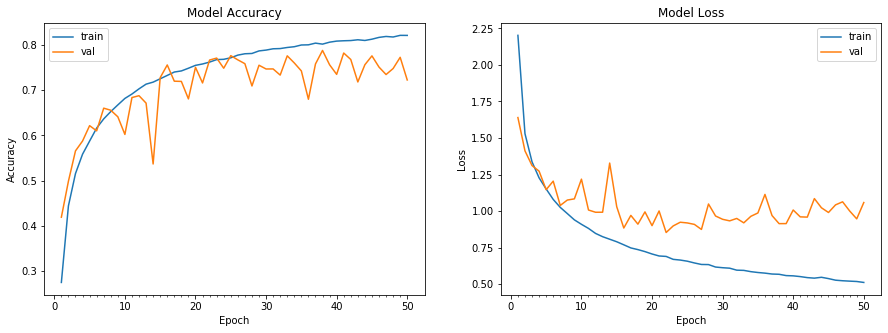

Accuracy on test data is: 72.27


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Fourth
- Remove Dropout from last layer

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_43 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_65 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_44 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_50 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_66 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 19s 49ms/step - loss: 1.9196 - acc: 0.3302 - val_loss: 1.6491 - val_acc: 0.4047
Epoch 2/50
390/390 [==============================] - 15s 40ms/step - loss: 1.4055 - acc: 0.4936 - val_loss: 1.3036 - val_acc: 0.5509
Epoch 3/50
390/390 [==============================] - 16s 40ms/step - loss: 1.2119 - acc: 0.5683 - val_loss: 1.2567 - val_acc: 0.5817
Epoch 4/50
390/390 [==============================] - 15s 39ms/step - loss: 1.0916 - acc: 0.6108 - val_loss: 1.0644 - val_acc: 0.6401
Epoch 5/50
390/390 [==============================] - 15s 39ms/step - loss: 1.0107 - acc: 0.6408 - val_loss: 1.1699 - val_acc: 0.6051
Epoch 6/50
390/390 [==============================] - 15s 40ms/step - loss: 0.9438 - acc: 0.6650 - val_loss: 1.1262 - val_acc: 0.6019
Epoch 7/50
390/390 [==============================] - 15s 39ms/step - loss: 0.8986 - acc: 0.6813 - val_loss: 1.1418 - val_acc: 0.6220
Epoch 8/50
390/390 [==============================] - 15s 40ms

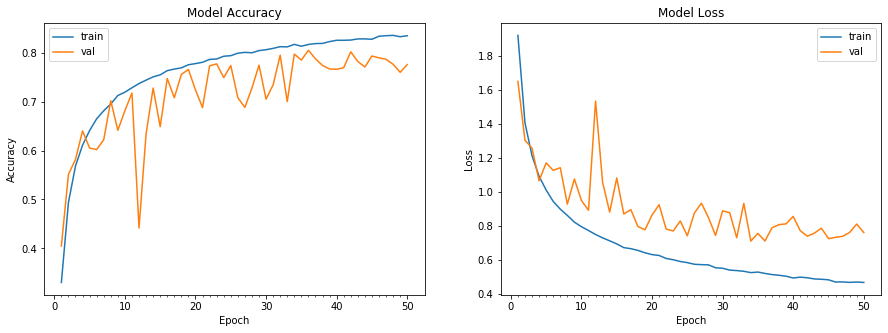

Accuracy on test data is: 77.57


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Fifth
- Reduce Dropout from 0.25 to 0.1


In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Reduce dropout (0.25 --> 0.1)

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_49 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_57 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_73 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_50 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_58 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_74 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 20s 50ms/step - loss: 1.6064 - acc: 0.4339 - val_loss: 1.6484 - val_acc: 0.4404
Epoch 2/50
390/390 [==============================] - 15s 40ms/step - loss: 1.1671 - acc: 0.5854 - val_loss: 1.2573 - val_acc: 0.5602
Epoch 3/50
390/390 [==============================] - 15s 39ms/step - loss: 0.9772 - acc: 0.6570 - val_loss: 1.5880 - val_acc: 0.4800
Epoch 4/50
390/390 [==============================] - 15s 40ms/step - loss: 0.8696 - acc: 0.6903 - val_loss: 0.9015 - val_acc: 0.6761
Epoch 5/50
390/390 [==============================] - 15s 39ms/step - loss: 0.7934 - acc: 0.7224 - val_loss: 0.8812 - val_acc: 0.6901
Epoch 6/50
390/390 [==============================] - 15s 40ms/step - loss: 0.7323 - acc: 0.7434 - val_loss: 0.7828 - val_acc: 0.7273
Epoch 7/50
390/390 [==============================] - 15s 39ms/step - loss: 0.6882 - acc: 0.7569 - val_loss: 0.7534 - val_acc: 0.7397
Epoch 8/50
390/390 [==============================] - 15s 40ms

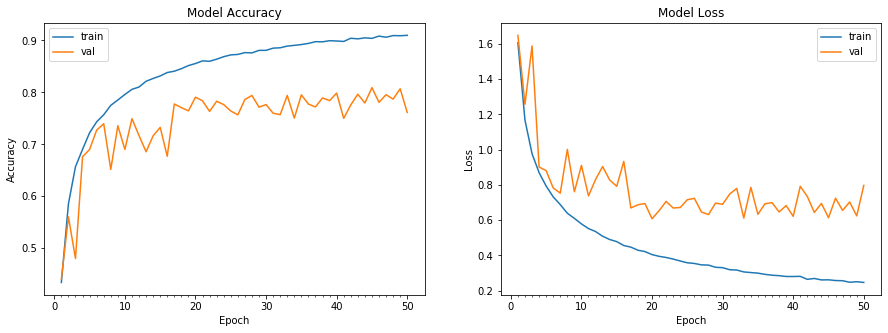

Accuracy on test data is: 76.14


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Sixth

- Remove all Dropout


In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Reduce dropout (0.25 --> 0.1)
# Remove all dropouts

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.1))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_55 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_65 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_56 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_66 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_82 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 20s 51ms/step - loss: 1.5676 - acc: 0.4423 - val_loss: 1.5871 - val_acc: 0.4580
Epoch 2/50
390/390 [==============================] - 15s 39ms/step - loss: 1.1464 - acc: 0.5968 - val_loss: 1.2107 - val_acc: 0.5918
Epoch 3/50
390/390 [==============================] - 15s 40ms/step - loss: 0.9622 - acc: 0.6627 - val_loss: 1.0310 - val_acc: 0.6394
Epoch 4/50
390/390 [==============================] - 15s 39ms/step - loss: 0.8410 - acc: 0.7061 - val_loss: 0.9882 - val_acc: 0.6612
Epoch 5/50
390/390 [==============================] - 15s 39ms/step - loss: 0.7555 - acc: 0.7356 - val_loss: 0.8878 - val_acc: 0.6919
Epoch 6/50
390/390 [==============================] - 15s 40ms/step - loss: 0.6964 - acc: 0.7555 - val_loss: 0.8021 - val_acc: 0.7255
Epoch 7/50
390/390 [==============================] - 15s 40ms/step - loss: 0.6428 - acc: 0.7744 - val_loss: 0.8048 - val_acc: 0.7266
Epoch 8/50
390/390 [==============================] - 15s 39ms

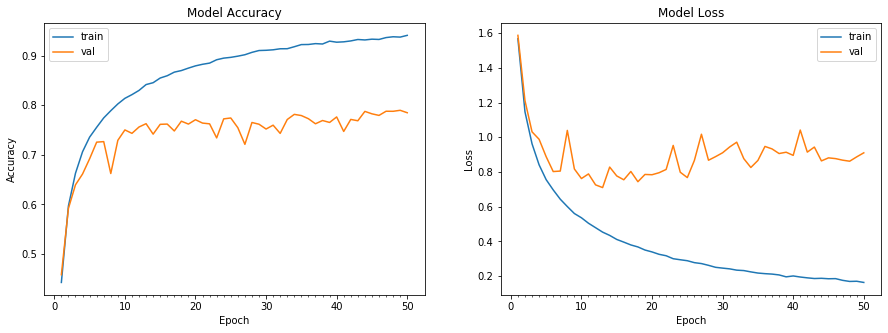

Accuracy on test data is: 78.49


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteraion: Seventh
- Bring dropouts back

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Reduce dropout (0.25 --> 0.1)
# Remove all dropouts
# Bring dropouts back

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_61 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_73 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_89 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_62 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_74 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_90 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 15, 15, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 21s 54ms/step - loss: 2.1258 - acc: 0.2859 - val_loss: 1.8103 - val_acc: 0.3761
Epoch 2/50
390/390 [==============================] - 16s 40ms/step - loss: 1.5325 - acc: 0.4377 - val_loss: 1.5290 - val_acc: 0.4838
Epoch 3/50
390/390 [==============================] - 16s 40ms/step - loss: 1.3447 - acc: 0.5127 - val_loss: 1.4512 - val_acc: 0.5384
Epoch 4/50
390/390 [==============================] - 16s 41ms/step - loss: 1.2310 - acc: 0.5571 - val_loss: 1.3878 - val_acc: 0.5899
Epoch 5/50
390/390 [==============================] - 16s 40ms/step - loss: 1.1505 - acc: 0.5882 - val_loss: 1.4593 - val_acc: 0.5334
Epoch 6/50
390/390 [==============================] - 16s 40ms/step - loss: 1.0863 - acc: 0.6154 - val_loss: 1.2780 - val_acc: 0.6402
Epoch 7/50
390/390 [==============================] - 16s 40ms/step - loss: 1.0257 - acc: 0.6364 - val_loss: 1.3181 - val_acc: 0.6690
Epoch 8/50
390/390 [==============================] - 16s 40ms

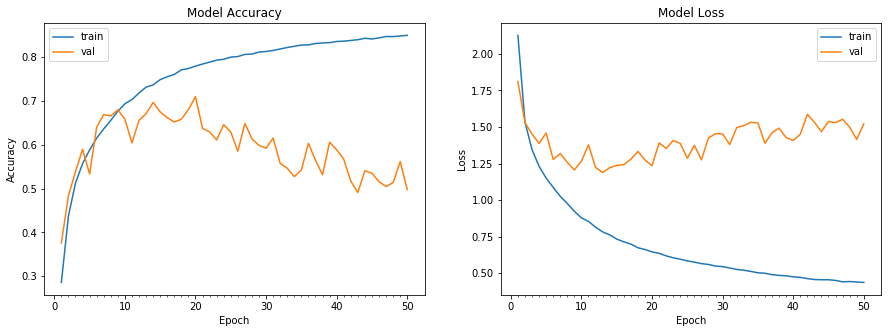

Accuracy on test data is: 49.79


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Eighth
- Reset to Fifth(Dropout 0.1)
- Increase batch size (128 --> 256)

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Reduce dropout (0.25 --> 0.1)
# Increase Batch size (128 --> 256)

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
195/195 [==============================] - 27s 140ms/step - loss: 1.6946 - acc: 0.3972 - val_loss: 1.4488 - val_acc: 0.4825
Epoch 2/50
195/195 [==============================] - 24s 124ms/step - loss: 1.2781 - acc: 0.5410 - val_loss: 1.2518 - val_acc: 0.5513
Epoch 3/50
195/195 [==============================] - 24s 124ms/step - loss: 1.0937 - acc: 0.6120 - val_loss: 1.2005 - val_acc: 0.5725
Epoch 4/50
195/195 [==============================] - 24s 124ms/step - loss: 0.9723 - acc: 0.6545 - val_loss: 1.0075 - val_acc: 0.6476
Epoch 5/50
195/195 [==============================] - 24s 125ms/step - loss: 0.8866 - acc: 0.6847 - val_loss: 0.9350 - val_acc: 0.6691
Epoch 6/50
195/195 [==============================] - 24s 125ms/step - loss: 0.8196 - acc: 0.7100 - val_loss: 0.8115 - val_acc: 0.7117
Epoch 7/50
195/195 [==============================] - 24s 125ms/step - loss: 0.7601 - acc: 0.7313 - val_loss: 0.8847 - val_acc: 0.6846
Epoch 8/50
195/195 [==============================] - 2

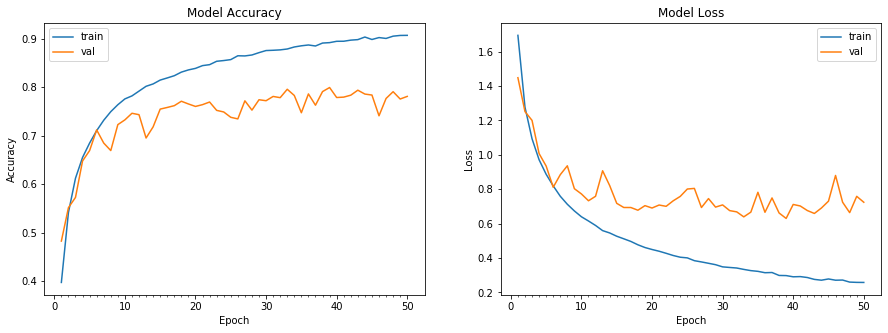

Accuracy on test data is: 78.08


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Ninth
- Increase batch size (128 --> 256 --> 512)

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Reduce dropout (0.25 --> 0.1)
# Increase Batch size (128 --> 256 --> 512)

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_13 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_14 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
97/97 [==============================] - 26s 272ms/step - loss: 1.8340 - acc: 0.3529 - val_loss: 1.7294 - val_acc: 0.3967
Epoch 2/50
97/97 [==============================] - 23s 235ms/step - loss: 1.3570 - acc: 0.5123 - val_loss: 1.3370 - val_acc: 0.5302
Epoch 3/50
97/97 [==============================] - 23s 235ms/step - loss: 1.1658 - acc: 0.5836 - val_loss: 1.3080 - val_acc: 0.5517
Epoch 4/50
97/97 [==============================] - 23s 234ms/step - loss: 1.0288 - acc: 0.6342 - val_loss: 1.2119 - val_acc: 0.5715
Epoch 5/50
97/97 [==============================] - 23s 235ms/step - loss: 0.9391 - acc: 0.6684 - val_loss: 1.1300 - val_acc: 0.6038
Epoch 6/50
97/97 [==============================] - 23s 235ms/step - loss: 0.8664 - acc: 0.6953 - val_loss: 0.9579 - val_acc: 0.6598
Epoch 7/50
97/97 [==============================] - 23s 236ms/step - loss: 0.8142 - acc: 0.7146 - val_loss: 0.9295 - val_acc: 0.6738
Epoch 8/50
97/97 [==============================] - 23s 235ms/step - 

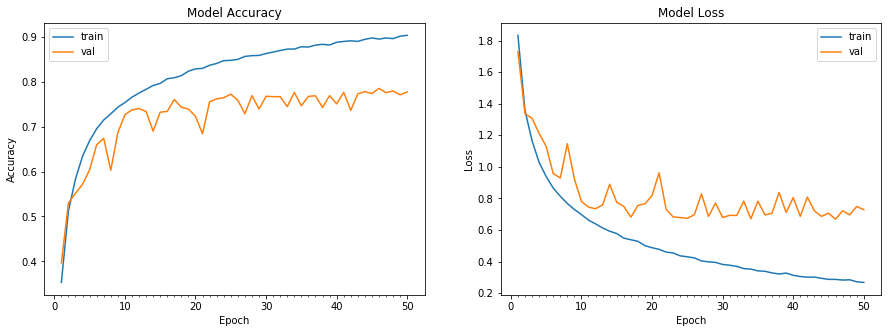

Accuracy on test data is: 77.72


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Tenth
- Reduce batch size (128 --> 64)

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Reduce dropout (0.25 --> 0.1)
# Increase Batch size (128 --> 256 --> 512)
# Reduce Batch size (128 --> 64)

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
# model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
# model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_20 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_26 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=781, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
781/781 [==============================] - 39s 50ms/step - loss: 1.5318 - acc: 0.4605 - val_loss: 1.4035 - val_acc: 0.5147
Epoch 2/50
781/781 [==============================] - 34s 43ms/step - loss: 1.0886 - acc: 0.6167 - val_loss: 1.0605 - val_acc: 0.6300
Epoch 3/50
781/781 [==============================] - 34s 43ms/step - loss: 0.9199 - acc: 0.6784 - val_loss: 0.9776 - val_acc: 0.6565
Epoch 4/50
781/781 [==============================] - 34s 43ms/step - loss: 0.8246 - acc: 0.7107 - val_loss: 1.0208 - val_acc: 0.6526
Epoch 5/50
781/781 [==============================] - 34s 43ms/step - loss: 0.7631 - acc: 0.7308 - val_loss: 0.8661 - val_acc: 0.7008
Epoch 6/50
781/781 [==============================] - 34s 43ms/step - loss: 0.7080 - acc: 0.7510 - val_loss: 0.8573 - val_acc: 0.7026
Epoch 7/50
781/781 [==============================] - 34s 43ms/step - loss: 0.6735 - acc: 0.7649 - val_loss: 0.8070 - val_acc: 0.7177
Epoch 8/50
781/781 [==============================] - 34s 43ms

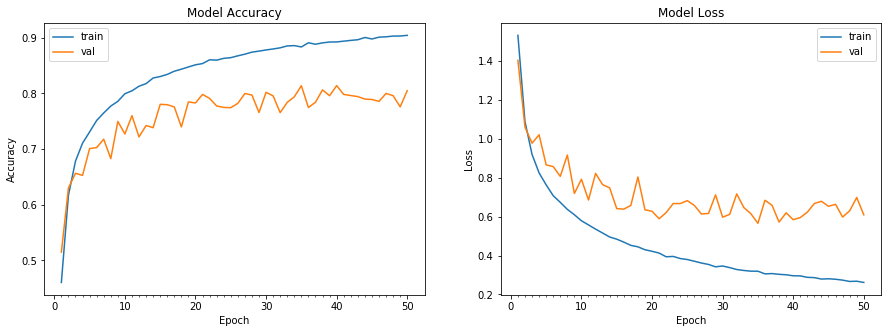

Accuracy on test data is: 80.49


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Eleventh
- Reduce batch size (128 --> 64 --> 32)

In [0]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Remove D1(393,728) and D2(131,328)
# Remove Dropout from last layer 
# Reduce dropout (0.25 --> 0.1)
# Increase Batch size (128 --> 256)
# Reduce Batch size (128 --> 64)
# Reduce Batch size (128 --> 64 --> 32)

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 32, RF -
model.add(BatchNormalization()) # 32
model.add(Activation('relu')) # 32
model.add(SeparableConv2D(48, 3, 3)) # 30
model.add(BatchNormalization()) # 30
model.add(Activation('relu'))   # 30
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.1)) # 15
model.add(SeparableConv2D(96, 3, 3, border_mode='same')) # 15
model.add(BatchNormalization())  # 15
model.add(Activation('relu'))    # 15
model.add(SeparableConv2D(96, 3, 3)) # 13
model.add(BatchNormalization())  # 13
model.add(Activation('relu'))    # 13
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.1)) # 6
model.add(SeparableConv2D(192, 3, 3, border_mode='same')) # 6
model.add(BatchNormalization()) # 6
model.add(Activation('relu')) # 6
model.add(SeparableConv2D(192, 3, 3)) # 4
model.add(BatchNormalization()) # 4
model.add(Activation('relu')) # 4
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.1))  # 2
model.add(Flatten()) # 1
# model.add(Dense(512))
model.add(BatchNormalization())  # 1
model.add(Activation('relu'))  # 1
model.add(Dropout(0.1))  # 1
# model.add(Dense(256))
model.add(BatchNormalization())  # 1
model.add(Activation('relu'))  # 1
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # 100
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableCo

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_25 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_26 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_34 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_34 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=1562, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
1562/1562 [==============================] - 52s 34ms/step - loss: 1.5006 - acc: 0.4692 - val_loss: 1.1766 - val_acc: 0.5778
Epoch 2/50
1562/1562 [==============================] - 49s 32ms/step - loss: 1.0869 - acc: 0.6148 - val_loss: 1.3856 - val_acc: 0.5499
Epoch 3/50
1562/1562 [==============================] - 49s 32ms/step - loss: 0.9266 - acc: 0.6750 - val_loss: 1.1001 - val_acc: 0.6277
Epoch 4/50
1562/1562 [==============================] - 49s 32ms/step - loss: 0.8399 - acc: 0.7072 - val_loss: 1.1926 - val_acc: 0.5851
Epoch 5/50
1562/1562 [==============================] - 50s 32ms/step - loss: 0.7716 - acc: 0.7289 - val_loss: 0.8589 - val_acc: 0.7047
Epoch 6/50
1562/1562 [==============================] - 49s 32ms/step - loss: 0.7278 - acc: 0.7454 - val_loss: 0.7567 - val_acc: 0.7446
Epoch 7/50
1562/1562 [==============================] - 49s 32ms/step - loss: 0.6894 - acc: 0.7623 - val_loss: 0.8404 - val_acc: 0.7118
Epoch 8/50
1562/1562 [==========================

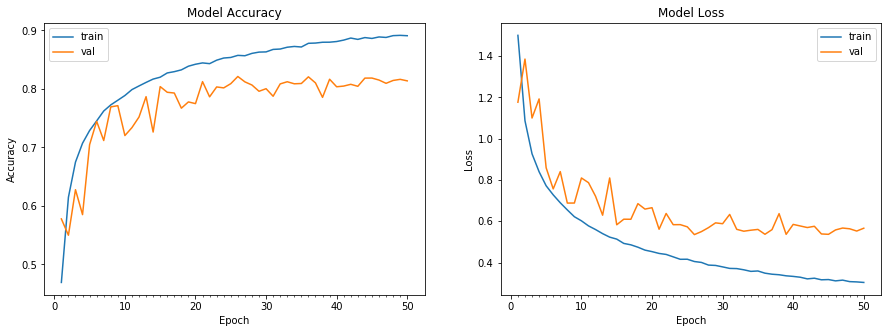

Accuracy on test data is: 81.38


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 32),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Iteration: Twelveth
- Remove dense layer in the last

In [46]:
# Define the model
# Replace Conv2D with SeparableConv2D
# Add BN before activation
# Remove D1(393,728) and D2(131,328)
# Remove Dropout from last layer 
# Reduce dropout (0.25 --> 0.1)
# Increase Batch size (128 --> 256)
# Reduce Batch size (128 --> 64)
# Reduce Batch size (128 --> 64 --> 32)
# Removed Last Dense layer --> Added GAP

model = Sequential()

model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # O/P Size: 32x32x48 , RF:3X3
model.add(BatchNormalization()) 
model.add(Activation('relu')) 

model.add(SeparableConv2D(48, 3, 3)) # O/P Size: 32x32x48 , RF:5X5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # O/P Size: 16x16x48 , RF:6X6
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, 3, 3, border_mode='same')) # O/P Size: 16x16x96 , RF:10X10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(96, 3, 3)) # O/P Size: 16x16x96 , RF:14X14
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # O/P Size: 8x8x96 , RF:16X16
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, 3, 3, border_mode='same')) # O/P Size: 8x8x192 , RF:24X24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConv2D(192, 3, 3)) # O/P Size: 8x8x192 , RF:32X32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # O/P Size: 4x4x192 , RF:36X36
model.add(Dropout(0.1))

model.add(SeparableConv2D(num_classes, 4, border_mode='same')) # O/P Size: 4x4x10 , RF:52x52

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/di

In [47]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_174 (Separa (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_161 (Bat (None, 32, 32, 48)        192       
_________________________________________________________________
activation_165 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_175 (Separa (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_162 (Bat (None, 30, 30, 48)        192       
_________________________________________________________________
activation_166 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 15, 15, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=1562, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
1562/1562 [==============================] - 57s 37ms/step - loss: 1.2771 - acc: 0.5436 - val_loss: 1.1481 - val_acc: 0.5924
Epoch 2/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.9202 - acc: 0.6766 - val_loss: 1.3218 - val_acc: 0.5895
Epoch 3/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.7875 - acc: 0.7244 - val_loss: 0.7687 - val_acc: 0.7360
Epoch 4/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.7105 - acc: 0.7530 - val_loss: 0.8419 - val_acc: 0.7206
Epoch 5/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.6542 - acc: 0.7710 - val_loss: 0.8042 - val_acc: 0.7303
Epoch 6/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.6148 - acc: 0.7874 - val_loss: 0.7681 - val_acc: 0.7449
Epoch 7/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.5746 - acc: 0.7998 - val_loss: 0.6888 - val_acc: 0.7618
Epoch 8/50
1562/1562 [==========================

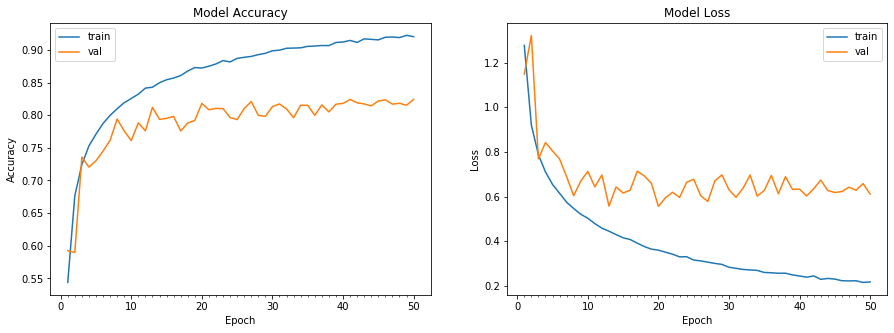

Accuracy on test data is: 82.44


In [48]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 32),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))